# Importing necessary packages

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns

In [2]:
# Loading Final Data Set using pandas
df = pd.read_csv('FINAL DATA SET.csv')

C:\Users\ypedd\AppData\Local\Temp\ipykernel_24008\2500593804.py:1: DtypeWarning: Columns (26,35,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('FINAL DATA SET.csv')


In [3]:
df

,BUCode,Segmentation,VIN first 11,Vin next 6,VIN,PlanType,SOW_PlanType,PSOW_PWPID,plancode,salesdate,...,2022 YTD change,2021 Trip winner,2020 Trip Winner,2019 Trip Winner,Right_BUCode,MVPYear-Quarter,Today's Contracts,Today's New Units,Today's Leased Units,Today's Used Units
0,5002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,-0.190425,Inner Circle,Inner Circle,Gold,5002.0,2021-Q1,388.0,156.0,154.0,154.0
1,5002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,-0.190425,Inner Circle,Inner Circle,Gold,5002.0,2021-Q2,512.0,200.0,128.0,211.0
2,5002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,-0.190425,Inner Circle,Inner Circle,Gold,5002.0,2021-Q3,466.0,153.0,102.0,110.0
3,5002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,-0.190425,Inner Circle,Inner Circle,Gold,5002.0,2021-Q4,449.0,153.0,99.0,175.0
4,5002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,-0.190425,Inner Circle,Inner Circle,Gold,5002.0,2022-Q1,418.0,172.0,104.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006648,69414,F2F,ZASPAKANXK7,802317,ZASPAKANXK7802317,U,MAJOR,Used Majors Stated Time,UM5601N,2022-12-27,...,NaN,NaN,NaN,NaN,69414.0,2022-Q4,5.0,9.0,40.0,154.0
3006649,69414,F2F,ZASPAKANXK7,881527,ZASPAKANXK7881527,S,C&M,Multicare,PREMCTW5,2022-12-27,...,NaN,NaN,NaN,NaN,69414.0,2022-Q1,9.0,1.0,12.0,27.0
3006650,69414,F2F,ZASPAKANXK7,881527,ZASPAKANXK7881527,S,C&M,Multicare,PREMCTW5,2022-12-27,...,NaN,NaN,NaN,NaN,69414.0,2022-Q2,22.0,6.0,28.0,41.0
3006651,69414,F2F,ZASPAKANXK7,881527,ZASPAKANXK7881527,S,C&M,Multicare,PREMCTW5,2022-12-27,...,NaN,NaN,NaN,NaN,69414.0,2022-Q3,4.0,7.0,93.0,35.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006653 entries, 0 to 3006652
Data columns (total 49 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   BUCode                              int64  
 1   Segmentation                        object 
 2   VIN first 11                        object 
 3   Vin next 6                          int64  
 4   VIN                                 object 
 5   PlanType                            object 
 6   SOW_PlanType                        object 
 7   PSOW_PWPID                          object 
 8   plancode                            object 
 9   salesdate                           object 
 10  ContractCnt                         int64  
 11  SaleSource                          object 
 12  Dealer Code                         int64  
 13  Group Flag                          object 
 14  State                               object 
 15  Zip Code                            int64  
 16  

In [5]:
df.columns

Index(['BUCode', 'Segmentation', 'VIN first 11', 'Vin next 6', 'VIN',
       'PlanType', 'SOW_PlanType', 'PSOW_PWPID', 'plancode', 'salesdate',
       'ContractCnt', 'SaleSource', 'Dealer Code', 'Group Flag', 'State',
       'Zip Code', 'Dealer Map Lattitude', 'Dealer Map Longitude',
       'Sales Group Size', 'Consolidated Franchise Code', 'Appointment Date',
       'Territory', 'BCName', 'PlanCategory', 'Description', 'Average Price',
       'VIN1_Car_Built', 'VIN23_Manufacturer', 'VIN48_Brand_Engine_Type',
       'VIN238_Flex_Fuel', 'VIN10_Model_Year', 'VIN11_Assembly',
       'Sum of Total Plans Qualified', 'Award Amount', 'Dealer Type',
       'Dealer Name', 'Sum of Major Qualified Plans',
       'Sum of Convenience Qualified Plans', 'three month Average CSI score',
       '2022 YTD change', '2021 Trip winner', '2020 Trip Winner',
       '2019 Trip Winner', 'Right_BUCode', 'MVPYear-Quarter',
       'Today's Contracts', 'Today's New Units', 'Today's Leased Units',
       'Today's U

In [6]:
df.describe()

,BUCode,Vin next 6,ContractCnt,Dealer Code,Zip Code,Dealer Map Lattitude,Dealer Map Longitude,Average Price,Sum of Total Plans Qualified,Award Amount,Sum of Major Qualified Plans,Sum of Convenience Qualified Plans,three month Average CSI score,2022 YTD change,Right_BUCode,Today's Contracts,Today's New Units,Today's Leased Units,Today's Used Units
count,3.006653e+06,3.006653e+06,3006653.0,3.006653e+06,3.006653e+06,3.006653e+06,3.006653e+06,3.006653e+06,3.006653e+06,1.297676e+06,3.006653e+06,3.006653e+06,1.683261e+06,1.698124e+06,3.006512e+06,3.006512e+06,3.006512e+06,3.006512e+06,3.006512e+06
mean,4.844492e+04,4.960385e+05,1.0,4.844492e+04,5.074938e+04,3.719506e+01,-9.067181e+01,5.486356e+02,8.423839e-01,1.847329e+03,1.055138e+01,9.802387e+00,9.180839e+02,2.389004e-01,4.844608e+04,4.150698e+02,2.019422e+02,6.538493e+01,2.415861e+02
std,1.506772e+04,2.907393e+05,0.0,1.506772e+04,2.782851e+04,5.394190e+00,1.456418e+01,5.334385e+02,4.232818e+00,3.181681e+03,2.896120e+01,2.968886e+01,4.149943e+01,4.026737e+00,1.506710e+04,4.565172e+02,1.655414e+02,1.133699e+02,2.056763e+02
min,5.002000e+03,2.000000e+00,1.0,5.002000e+03,1.020000e+03,1.347560e+01,-1.593760e+02,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.020000e+02,-1.000000e+00,5.002000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.268500e+04,2.435110e+05,1.0,4.268500e+04,2.878600e+04,3.342800e+01,-9.730160e+01,1.530000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.997450e+02,-2.095418e-01,4.268500e+04,1.180000e+02,8.700000e+01,6.000000e+00,1.330000e+02
50%,4.556400e+04,4.953740e+05,1.0,4.556400e+04,4.835600e+04,3.860260e+01,-8.636010e+01,4.210000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.268083e+02,-5.985728e-02,4.556400e+04,2.530000e+02,1.550000e+02,2.600000e+01,1.760000e+02
75%,6.071000e+04,7.482610e+05,1.0,6.071000e+04,7.705400e+04,4.151810e+01,-8.029120e+01,4.490000e+02,0.000000e+00,2.360000e+03,0.000000e+00,0.000000e+00,9.455821e+02,1.059177e-01,6.071000e+04,5.460000e+02,2.680000e+02,7.200000e+01,2.950000e+02
max,6.941400e+04,9.999980e+05,1.0,6.941400e+04,9.980100e+04,6.481480e+01,1.447711e+02,2.962000e+03,5.000000e+01,1.610000e+04,2.370000e+02,1.970000e+02,1.000000e+03,2.429677e+02,6.941400e+04,3.203000e+03,1.531000e+03,1.257000e+03,1.939000e+03


In [7]:
# Making the BUCode of length 5
df['BUCode'] = df['BUCode'].apply(lambda x: str(x).zfill(5))

In [8]:
# Checking the null values
df.isnull().any()

BUCode                                False
Segmentation                          False
VIN first 11                          False
Vin next 6                            False
VIN                                   False
PlanType                              False
SOW_PlanType                          False
PSOW_PWPID                            False
plancode                              False
salesdate                             False
ContractCnt                           False
SaleSource                            False
Dealer Code                           False
Group Flag                            False
State                                 False
Zip Code                              False
Dealer Map Lattitude                  False
Dealer Map Longitude                  False
Sales Group Size                      False
Consolidated Franchise Code           False
Appointment Date                      False
Territory                             False
BCName                          

In [9]:
filtered_df = df[df.columns[~df.isnull().any()]]

In [10]:
filtered_df.columns

Index(['BUCode', 'Segmentation', 'VIN first 11', 'Vin next 6', 'VIN',
       'PlanType', 'SOW_PlanType', 'PSOW_PWPID', 'plancode', 'salesdate',
       'ContractCnt', 'SaleSource', 'Dealer Code', 'Group Flag', 'State',
       'Zip Code', 'Dealer Map Lattitude', 'Dealer Map Longitude',
       'Sales Group Size', 'Consolidated Franchise Code', 'Appointment Date',
       'Territory', 'BCName', 'PlanCategory', 'Average Price',
       'VIN1_Car_Built', 'VIN48_Brand_Engine_Type', 'VIN238_Flex_Fuel',
       'VIN10_Model_Year', 'VIN11_Assembly', 'Sum of Total Plans Qualified',
       'Dealer Type', 'Sum of Major Qualified Plans',
       'Sum of Convenience Qualified Plans'],
      dtype='object')

In [11]:
len(filtered_df['Dealer Code'].unique())

2386

In [12]:
# Grouping by Dealer Code getting the mean on Average Price
filtered_df['Revenue_Per_Dealer'] = filtered_df.groupby(by='Dealer Code')['Average Price'].transform(np.mean)

C:\Users\ypedd\AppData\Local\Temp\ipykernel_24008\43662384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Revenue_Per_Dealer'] = filtered_df.groupby(by='Dealer Code')['Average Price'].transform(np.mean)


In [13]:
# Grouping by Dealer Code and counting the VINs in each group
filtered_df['Vehicles_Per_Dealer'] = filtered_df.groupby(by='Dealer Code')['VIN'].transform('count')

C:\Users\ypedd\AppData\Local\Temp\ipykernel_24008\2440247368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Vehicles_Per_Dealer'] = filtered_df.groupby(by='Dealer Code')['VIN'].transform('count')


In [14]:
# Grouping by VIN and getting the mean of the average price in each group
filtered_df['Revenue_Per_Vehicle'] = filtered_df.groupby(by='VIN')['Average Price'].transform(np.mean)

C:\Users\ypedd\AppData\Local\Temp\ipykernel_24008\3710015581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Revenue_Per_Vehicle'] = filtered_df.groupby(by='VIN')['Average Price'].transform(np.mean)


In [15]:
filtered_df.head()

,BUCode,Segmentation,VIN first 11,Vin next 6,VIN,PlanType,SOW_PlanType,PSOW_PWPID,plancode,salesdate,...,VIN238_Flex_Fuel,VIN10_Model_Year,VIN11_Assembly,Sum of Total Plans Qualified,Dealer Type,Sum of Major Qualified Plans,Sum of Convenience Qualified Plans,Revenue_Per_Dealer,Vehicles_Per_Dealer,Revenue_Per_Vehicle
0,05002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,C4G,C,L,0,BMA,0,0,689.966038,2120,421.0
1,05002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,C4G,C,L,0,BMA,0,0,689.966038,2120,421.0
2,05002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,C4G,C,L,0,BMA,0,0,689.966038,2120,421.0
3,05002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,C4G,C,L,0,BMA,0,0,689.966038,2120,421.0
4,05002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,C4G,C,L,0,BMA,0,0,689.966038,2120,421.0


In [16]:
filtered_df = filtered_df[['Revenue_Per_Dealer', 'Vehicles_Per_Dealer', 'Revenue_Per_Vehicle']]

In [17]:
filtered_df

,Revenue_Per_Dealer,Vehicles_Per_Dealer,Revenue_Per_Vehicle
0,689.966038,2120,421.0
1,689.966038,2120,421.0
2,689.966038,2120,421.0
3,689.966038,2120,421.0
4,689.966038,2120,421.0
...,...,...,...
3006648,887.800000,20,1541.0
3006649,887.800000,20,394.0
3006650,887.800000,20,394.0
3006651,887.800000,20,394.0


In [18]:
filtered_df.columns

Index(['Revenue_Per_Dealer', 'Vehicles_Per_Dealer', 'Revenue_Per_Vehicle'], dtype='object')

In [19]:
# Filled NA values with 0
filtered_df = filtered_df.fillna(0)

In [20]:
# Getting the columns of type numerical
continous_cols = filtered_df.select_dtypes(include='number').columns

In [21]:
# Getting the column names of type categorical
categorical_cols = filtered_df.select_dtypes(exclude='number').columns

In [22]:
categorical_cols, continous_cols

(Index([], dtype='object'),
 Index(['Revenue_Per_Dealer', 'Vehicles_Per_Dealer', 'Revenue_Per_Vehicle'], dtype='object'))

In [23]:
# Encoding all the categorical column types
encodings = {}
for col in categorical_cols:
    if filtered_df[col].dtype == 'O':
        filtered_df[col] = filtered_df[col].astype(str)
        le = LabelEncoder()
        filtered_df[col] = le.fit_transform(filtered_df[col])
        encodings[col] = le

In [24]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006653 entries, 0 to 3006652
Data columns (total 3 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Revenue_Per_Dealer   float64
 1   Vehicles_Per_Dealer  int64  
 2   Revenue_Per_Vehicle  float64
dtypes: float64(2), int64(1)
memory usage: 68.8 MB


In [25]:
# scaler = StandardScaler()
# filtered_df[continous_cols] = scaler.fit_transform(filtered_df[continous_cols])

In [26]:
filtered_df

,Revenue_Per_Dealer,Vehicles_Per_Dealer,Revenue_Per_Vehicle
0,689.966038,2120,421.0
1,689.966038,2120,421.0
2,689.966038,2120,421.0
3,689.966038,2120,421.0
4,689.966038,2120,421.0
...,...,...,...
3006648,887.800000,20,1541.0
3006649,887.800000,20,394.0
3006650,887.800000,20,394.0
3006651,887.800000,20,394.0


Text(0, 0.5, 'Sum of squared distance')

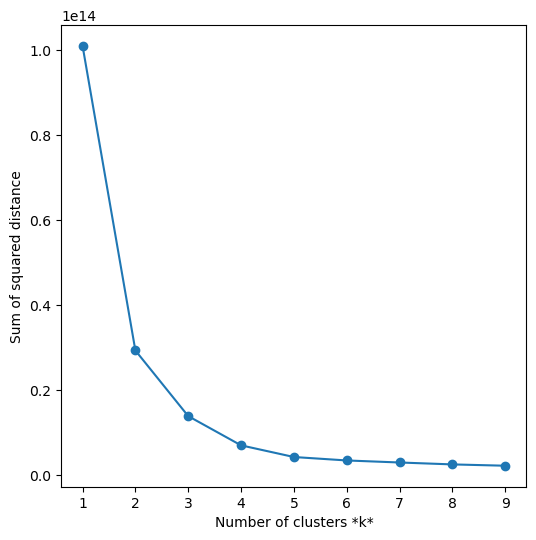

In [27]:
# Plotting the SSE over different clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km_pca = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km_pca.fit(filtered_df)
    sse.append(km_pca.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [28]:
# K Means model with 4 clusters
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans.fit(filtered_df)

KMeans(n_clusters=4, random_state=42)

In [29]:
set(kmeans.labels_)

{0, 1, 2, 3}

In [98]:
kmeans.labels_ = kmeans.labels_ + 1

In [99]:
set(kmeans.labels_)

{1, 2, 3, 4}

In [100]:
filtered_df['Segment PCA'] = kmeans.labels_

In [101]:
filtered_df

,Revenue_Per_Vehicle,Revenue_Per_Dealer,Vehicles_Per_Dealer,Segment PCA
0,421.0,689.966038,2120,1
1,421.0,689.966038,2120,1
2,421.0,689.966038,2120,1
3,421.0,689.966038,2120,1
4,421.0,689.966038,2120,1
...,...,...,...,...
3006648,1541.0,887.800000,20,1
3006649,394.0,887.800000,20,1
3006650,394.0,887.800000,20,1
3006651,394.0,887.800000,20,1


In [85]:
filtered_df['Segment PCA'].value_counts()

1    1831007
3     739190
4     274560
2     161896
Name: Segment PCA, dtype: int64

In [86]:
# Concatenating DF and Filtered DF on axis = 1 and extracting BUCode and Segment PCA Columns
bucode_clusters = pd.concat([df, filtered_df], axis=1)[['BUCode', 'Segment PCA']]
display(bucode_clusters)
bucode_clusters.to_csv('BUCode_Clusters.csv')

,BUCode,Segment PCA
0,05002,1
1,05002,1
2,05002,1
3,05002,1
4,05002,1
...,...,...
3006648,69414,1
3006649,69414,1
3006650,69414,1
3006651,69414,1


In [87]:
df

,BUCode,Segmentation,VIN first 11,Vin next 6,VIN,PlanType,SOW_PlanType,PSOW_PWPID,plancode,salesdate,...,2022 YTD change,2021 Trip winner,2020 Trip Winner,2019 Trip Winner,Right_BUCode,MVPYear-Quarter,Today's Contracts,Today's New Units,Today's Leased Units,Today's Used Units
0,05002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,-0.190425,Inner Circle,Inner Circle,Gold,5002.0,2021-Q1,388.0,156.0,154.0,154.0
1,05002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,-0.190425,Inner Circle,Inner Circle,Gold,5002.0,2021-Q2,512.0,200.0,128.0,211.0
2,05002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,-0.190425,Inner Circle,Inner Circle,Gold,5002.0,2021-Q3,466.0,153.0,102.0,110.0
3,05002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,-0.190425,Inner Circle,Inner Circle,Gold,5002.0,2021-Q4,449.0,153.0,99.0,175.0
4,05002,F2F,1C4AJWBG0CL,358982,1C4AJWBG0CL358982,U,OTHER,CPOV Base Warranties,CPOGO33,2022-12-10,...,-0.190425,Inner Circle,Inner Circle,Gold,5002.0,2022-Q1,418.0,172.0,104.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006648,69414,F2F,ZASPAKANXK7,802317,ZASPAKANXK7802317,U,MAJOR,Used Majors Stated Time,UM5601N,2022-12-27,...,NaN,NaN,NaN,NaN,69414.0,2022-Q4,5.0,9.0,40.0,154.0
3006649,69414,F2F,ZASPAKANXK7,881527,ZASPAKANXK7881527,S,C&M,Multicare,PREMCTW5,2022-12-27,...,NaN,NaN,NaN,NaN,69414.0,2022-Q1,9.0,1.0,12.0,27.0
3006650,69414,F2F,ZASPAKANXK7,881527,ZASPAKANXK7881527,S,C&M,Multicare,PREMCTW5,2022-12-27,...,NaN,NaN,NaN,NaN,69414.0,2022-Q2,22.0,6.0,28.0,41.0
3006651,69414,F2F,ZASPAKANXK7,881527,ZASPAKANXK7881527,S,C&M,Multicare,PREMCTW5,2022-12-27,...,NaN,NaN,NaN,NaN,69414.0,2022-Q3,4.0,7.0,93.0,35.0


In [52]:
centroids = kmeans.cluster_centers_

In [53]:
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

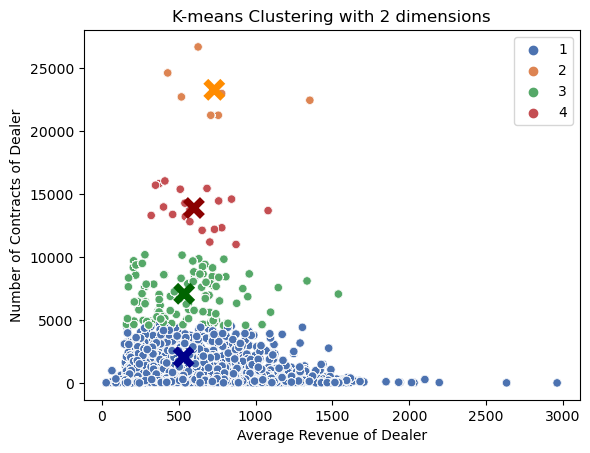

In [103]:
# Plotting the clusters and their centroids
sns.scatterplot(x="Revenue_Per_Dealer", y="Vehicles_Per_Dealer", hue=kmeans.labels_, data=filtered_df, palette='deep')
plt.scatter(centroids_x,centroids_y, marker = "x", s=150,linewidths = 5, zorder = 10, c=['darkblue', 'darkorange', 'darkgreen', 'darkred'])
plt.title('K-means Clustering with 2 dimensions')
plt.xlabel('Average Revenue of Dealer')
plt.ylabel('Number of Contracts of Dealer')
plt.show()

Text(0.5, 0, 'He')

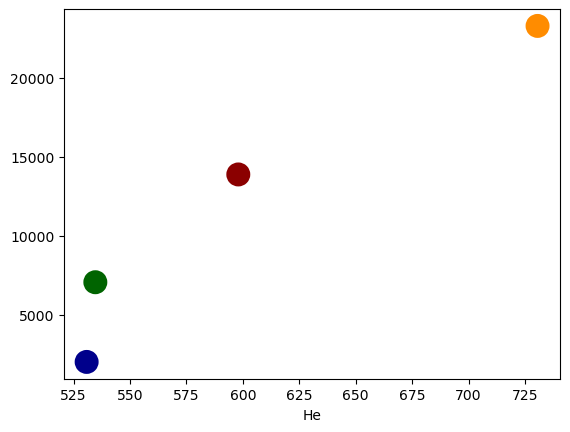

In [96]:
# Plotting just the centroids of the clusters
plt.scatter(centroids_x,centroids_y, marker = "o", s=150,linewidths = 5, zorder = 10, c=['darkblue', 'darkorange', 'darkgreen', 'darkred'])
plt.xlabel('He')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

N = 1000
X0 = np.random.normal(np.repeat(np.random.uniform(0, 20, 4), N), 1)
X1 = np.random.normal(np.repeat(np.random.uniform(0, 10, 4), N), 1)
X = np.vstack([X0, X1]).T
y = np.repeat(range(4), N)
colors = ['red', 'blue', 'purple', 'green']
ax = sns.scatterplot(X[:, 0], X[:, 1], hue=y, palette=colors, alpha=0.5, s=7)

means = np.vstack([X[y == i].mean(axis=0) for i in range(4)])
ax = sns.scatterplot(means[:, 0], means[:, 1], hue=range(4), palette=colors, s=20, ec='black', legend=False, ax=ax)
plt.show()

In [43]:
filtered_df

,Revenue_Per_Dealer,Vehicles_Per_Dealer,Revenue_Per_Vehicle,Segment PCA
0,689.966038,2120,421.0,0
1,689.966038,2120,421.0,0
2,689.966038,2120,421.0,0
3,689.966038,2120,421.0,0
4,689.966038,2120,421.0,0
...,...,...,...,...
3006648,887.800000,20,1541.0,0
3006649,887.800000,20,394.0,0
3006650,887.800000,20,394.0,0
3006651,887.800000,20,394.0,0


In [47]:
filtered_df = filtered_df[['Revenue_Per_Vehicle', 'Revenue_Per_Dealer', 'Vehicles_Per_Dealer']]

In [48]:
predictions = kmeans.predict(filtered_df)

C:\Users\ypedd\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [50]:
filtered_df

,Revenue_Per_Vehicle,Revenue_Per_Dealer,Vehicles_Per_Dealer
0,421.0,689.966038,2120
1,421.0,689.966038,2120
2,421.0,689.966038,2120
3,421.0,689.966038,2120
4,421.0,689.966038,2120
...,...,...,...
3006648,1541.0,887.800000,20
3006649,394.0,887.800000,20
3006650,394.0,887.800000,20
3006651,394.0,887.800000,20


In [63]:
filtered_df.loc[:10000,:]

,Revenue_Per_Vehicle,Revenue_Per_Dealer,Vehicles_Per_Dealer
0,421.0,689.966038,2120
1,421.0,689.966038,2120
2,421.0,689.966038,2120
3,421.0,689.966038,2120
4,421.0,689.966038,2120
...,...,...,...
9996,153.0,350.932292,3072
9997,153.0,350.932292,3072
9998,153.0,350.932292,3072
9999,153.0,350.932292,3072


In [65]:
kmeans.labels_[:100000]

array([0, 0, 0, ..., 0, 0, 0])

## Performance Evaluation

In [81]:
score = silhouette_score(filtered_df.loc[:,:], kmeans.labels_[:])

In [70]:
score

0.7165976740458652

In [76]:
ch_score = calinski_harabasz_score(filtered_df, kmeans.labels_)

In [77]:
ch_score

13677627.084304756

In [78]:
db_score = davies_bouldin_score(filtered_df, kmeans.labels_)

In [79]:
db_score

0.468299081555556